Curso Especialización en Intelixencia Artificial e Big Data

Sistemas de Aprendizaxe Automático

IES de Teis - Vigo

Prueba práctica UD2: Aprendizaje supervisado

**Nombre:**


En esta prueba se plantea un supuesto práctico como los que se han trabajado durante la UD2. Se proporciona un dataset con datos clasificados y una serie de cuestiones que deben abordarse.

Al finalizar la prueba se debe subir el notebook a la tarea del aula virtual.

Descripción del Dataset:

Se trata de un caso de clasificación binaria en la que se pretende predecir a partir de las siguientes variables si el cliente va o comprar un coche o no.

UserID: numérico (entero)

Gender(género): categórico

Age (edad): numérico 

Annual Salary: numérico 


Variable a predecir:

Purchased (¿Comprado?): (No=0, Sí=1)

El dataset se encuentra en el fichero *cars_data.csv*

## 1.Importación de paquetes y dataset

Importa aquí todos los paquetes que utilices 

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Importa el dataset

In [241]:
df= pd.read_csv('car_data.csv')
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


## 2. EDA y visual EDA (0.75 pts)

 Analiza los datos numéricos, ¿Hay outliers o datos anómalos?



Visualiza las relaciones entre las variables independientes y comentalas. ¿Hay alguna relación entre el género y la decisión de compra? ¿Y del resto de variables con la decisión de compra? ¿Es un dataset balanceado?. Verifica visualmente si hay outliers. Justifica las respuestas.

<Axes: >

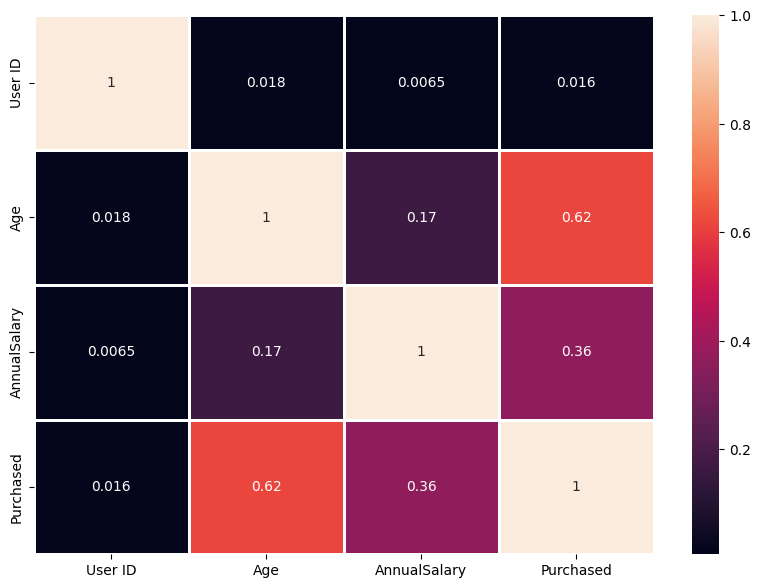

In [242]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=2)

### Gracias a la gráfica se puede observar que no existe realación etre el género y la compra ya que el género no es un valor numérico. En cuanto si existen otras variables que afecten a la compra se puede observar como la variable age es la que más afectada por purchased

## 3.- Preprocessing (0,25 pts)

Realiza el procesado de los datos que creas oportuno antes de realizar el entrenamiento. Justifica los pasos realizados.

### Comprobamos si hay missing values

In [243]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

### No hay missing values

### Tratado de valores categóricos

In [244]:
# Para tratar los datos categóricos cambiaremos la columna gender a numeros de 0(Female) y 1(Male) ya que los algoritmos no suelen tolerar bien los valores categóricos
def class_convert(Gender):
    if Gender=='Male':
        return 1
    else:
        return 0

In [245]:
df['Gender']=df['Gender'].apply(class_convert)

df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


## 4.División del dataset

Divide el dataset para entrenar los modelos y poder obtener las métricas de la clasificación.

In [246]:
# Separar las variables (X) y las etiquetas (y) del conjunto de datos
x = df.iloc[:, :-1].values
y = df.iloc[:, [-1]].values
print("Feature set size:",x.shape)
print("Variable set size:",y.shape)

Feature set size: (1000, 4)
Variable set size: (1000, 1)


##  5.- Regresión logística (0.25 pts)

5.1. Clasificador y entrenamineto

 Entrena un clasificador de regresión logística

In [247]:
clf1 = LogisticRegression(penalty='l2')

clf1.fit(X_train,y_train)

/home/a23juancm/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

5.2. Informe de clasificación

Obtén la accuracy, matriz de confusión y la precisión

In [248]:
### precisión/accuracy
clf1.score(X_test,y_test)

0.73

In [249]:
### Matríz de confusión
print(confusion_matrix(y_test, clf1.predict(X_test)))

[[96 25]
 [29 50]]


De acuerdo a la accuracy ¿Es un buen modelo? Justifica tu respuesta

### No sería un modelo adecuado ya que la accuracy es de un 0.73 lo cual es bastante mala para un algoritmo de este tipo, principalmente se quiere una acuraccy del 0.90 como mínimo para que el las predicciones sean aceptables ya que si no nos podría dar un caso de underfitting

## 6.- Árboles de decisión (1 pt)

Entrena un clasificador de árbol de decisiones con los mismos datos empleados para el clasificador anterior

In [250]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

Visualiza gráficamente el árbol del modelo

In [251]:
export_graphviz(tree_clf, 
                out_file='decisiontree.dot',
                feature_names=['User ID','Gender','Age','AnnualSalary'],
                class_names=['Purchased','Non Purchased'],
                rounded=True,
                filled=True)

In [252]:
! dot -Tpng decisiontree.dot -o decisiontree.png

Resultado

![Resultado](decisiontree.png)

De acuerdo al criterio de Gini, qué características están aportando más información a la hora de dividir los nodos.

### Serían Annualsalary y Age

Calcula la accuracy del modelo:

In [253]:
print("Precisión en conjunto de datos de entrenamiento: {:.3f}".format(tree_clf.score(X_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.3f}".format(tree_clf.score(X_test, y_test)))

Precisión en conjunto de datos de entrenamiento: 0.895
Precisión en el conjunto de datos de evaluación: 0.925


En términos de accuracy, ¿Es un buen modelo? Razona la respuesta

### No es un mál modelo ya que la accuracy es cercana a 0.90 en el train split y un 0.92 en el test split lo cual lo hacen un buen modelo a diferencia del anteror modelo que poseia una accuracy del 0.7

Obtén la matriz de confusión

In [254]:
print(confusion_matrix(y_test, tree_clf.predict(X_test)))

[[110  11]
 [  4  75]]


## 7.- Support Vector Machines (SVMs) (0,75 pts)

Entrena un SVM lineal y calcula la accuracy del modelo.

In [255]:
svm_clf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(x, y)

/home/a23juancm/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/a23juancm/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/a23juancm/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [256]:
svm_clf.score(x, y)

0.827

Respecto a los modelos anteriores, ¿ha mejorado o empeorado? ¿a qué puede ser debido?

### Ha mejorado significativamente en respecto al logistic regresión ya que su score es de 0.8 pero todavía no se acerca al score del decision tree, este resultado se deba al numero de datos que poseemos, si utilizaramos el kernerl trick podríamos mejorar el score del algortimo

Utiliza un clasificador SVM que logre mejorar los resultados de accuracy anteriores. ¿Qué parámetro(s) has evaluado para mejorar el modelo?